Todo:

- [ ] handle data imbalance
 - [ ] if needed - augment images
- [ ] resize images ?


Done:

- [x] check if all signs are in both train & test dirs
- [x] add some data presentation (# of images and matplotlib ...)

In [1]:
DATA_PATH = './drive/MyDrive/'

# 1. Data

## 1.1 Checking the data

### 1.1.1 Check if all signs are in both train & test dirs

In [2]:
import os

train_names = [dir for dir in os.listdir(DATA_PATH + 'train/')]
test_names = [dir for dir in os.listdir(DATA_PATH + 'test/')]
print(f'Negative intersection train_names ^ test_names = {set(train_names) ^ set(test_names)}')

Negative intersection train_names ^ test_names = set()


So we know that both train and test sets have the same kinds of traffic signs

### 1.1.2 Check the number of train and test cases

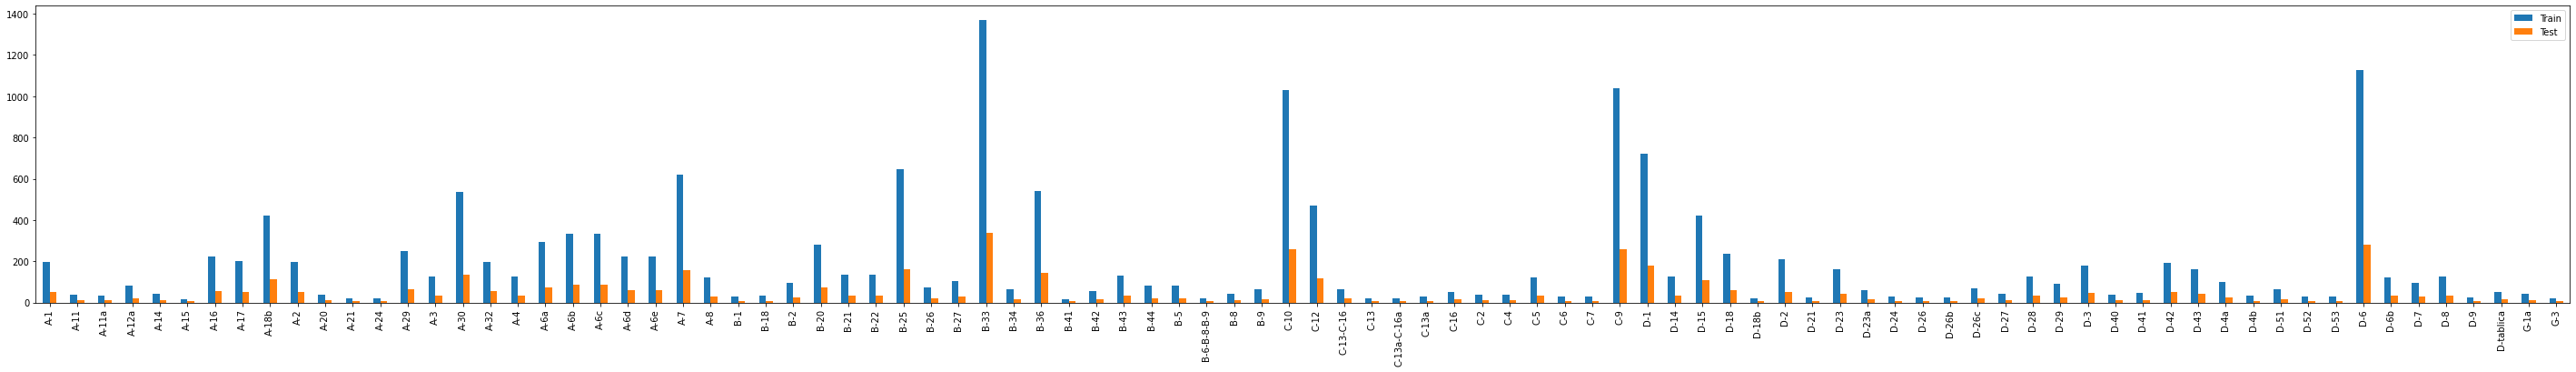

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

train_signs = [len(os.listdir(DATA_PATH + 'train/'+dir)) for dir in os.listdir(DATA_PATH + 'train/')]
test_signs = [len(os.listdir(DATA_PATH + 'test/'+dir)) for dir in os.listdir(DATA_PATH + 'test/')]

df = pd.DataFrame(np.c_[train_signs,test_signs], index=train_names)
df.plot.bar(figsize=(50,6))
plt.legend(['Train','Test'])
plt.show()

As we see, the numbers of images of each traffic sign highly differ between themselves.


## 1.2 Data presentation

Load 5 images of each traffic sign from train & test sets

In [5]:
import matplotlib.image as mpimg
import random

def read_signs_images(dir, number):
  images = []
  for signs_dir in os.listdir(dir):
    i = 0
    for sign_image_name in os.listdir(os.path.join(dir, signs_dir)):
      sign_image = mpimg.imread(os.path.join(dir, signs_dir, sign_image_name))
      images.append((sign_image,signs_dir))
      i += 1
      if i == number:
        break
  return images

train_images = read_signs_images(DATA_PATH + 'train',5)
test_images = read_signs_images(DATA_PATH + 'test',5)
random.shuffle(train_images)
random.shuffle(test_images)
print(f'Number of read train images: {len(train_images)}')
print(f'Number of read test images: {len(test_images)}')

Number of read train images: 460
Number of read test images: 460


Data presentation

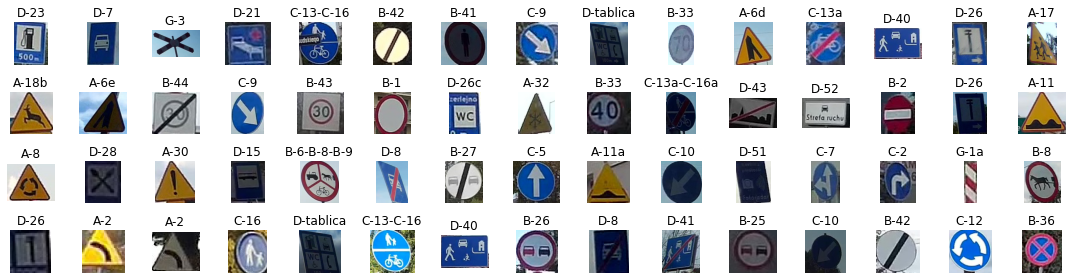

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (5, 5)
col = 15
row = 4
fig = plt.figure(figsize=(col, row))
for i in range(1,col*row + 1):
  fig.add_subplot(row, col, i)
  plt.axis('off')
  plt.imshow(train_images[i][0])
  plt.title(f'{train_images[i][1]}')
fig.tight_layout()
plt.show()

# 2 ANN